### Data Cleaning

In [1]:
import pandas as pd

In [2]:
mbti_df = pd.read_csv('/Users/aungpao/Documents/Coding/MBTI_datavis/reddit_psychometric_data.csv')

In [3]:
mbti_df

,mbti_type,post_AskRedditAfterDark,post_unpopularopinion,post_introvert,post_UnpopularFacts,post_changemyview,post_nihilism,post_IntellectualDarkWeb,post_todayilearned,post_banned,...,comment_actual_detrans,comment_dearbrother,comment_battlefield_4,comment_fixingmovies,comment_AFD,comment_Actage,comment_sariyerbelediyesi,comment_Ben10,comment_MKMemes,comment_PIED
0,INTP,3,31,3,1,4,1,1,3,1,...,0,0,0,0,0,0,0,0,0,0
1,ENTP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,INFJ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,INFP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ENTP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,INTP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3582,ENFP,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
3583,INTP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,1,3,0
3584,INTP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(f"This dataset has {mbti_df.shape[0]:,} entries \
and {mbti_df.shape[1]:,} rows")

This dataset has 3,586 entriesand 27,091 rows


In [5]:
mbti_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Columns: 27091 entries, mbti_type to comment_PIED
dtypes: int64(27090), object(1)
memory usage: 741.2+ MB


Too many column to extract, so I save it as txt

In [6]:
with open(r'/Users/aungpao/Documents/Coding/MBTI_datavis/allcolumns.txt', 'w') as fp:
    for item in mbti_df.columns.values.tolist():
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


### Data Exploration, Analysis and Visualisation

In [7]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
matplotlib.rcParams['agg.path.chunksize'] = 10000 # increased chunksize because 
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

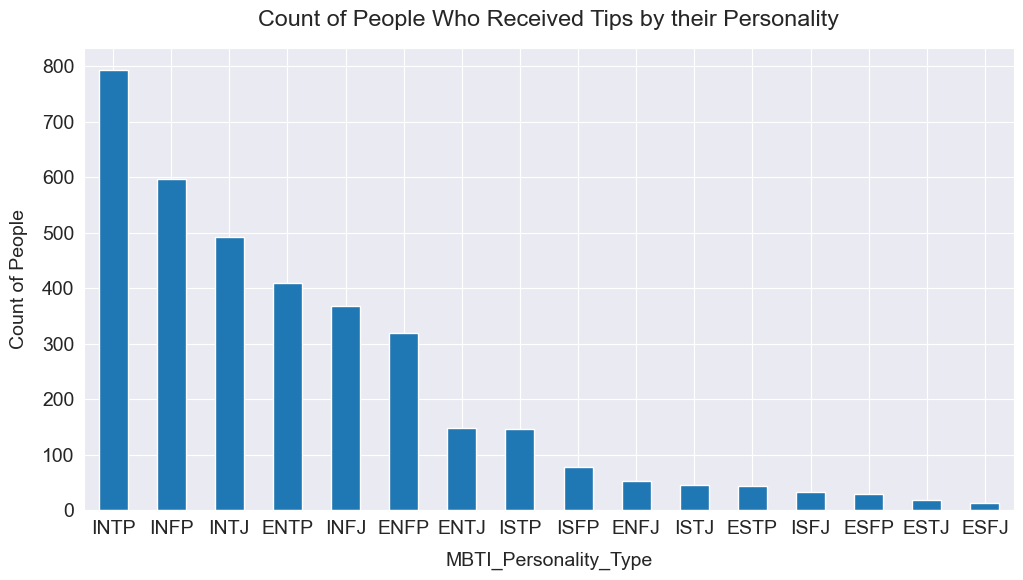

In [9]:
mbti_df['mbti_type'].value_counts().plot(kind='bar', figsize=(12, 6), rot=0)
plt.xlabel("MBTI_Personality_Type", labelpad=10) #labelpad = distance between xlabel and graph
plt.ylabel("Count of People", labelpad=10) #labelpad = distance between ylabel and graph
plt.title("Count of People Who Received Tips by their Personality", y=1.03);

In [10]:
#create empty dataframe
df = pd.DataFrame()

In [11]:
datas = []
for col in mbti_df.columns.values.tolist():
    if col == 'mbti_type':
        pass
    else:
        data = [str(col), mbti_df[col].sum()]
        datas.append(data)
    
df = pd.DataFrame(datas, columns=['Name', 'Count'])

In [12]:
df

,Name,Count
0,post_AskRedditAfterDark,8
1,post_unpopularopinion,613
2,post_introvert,85
3,post_UnpopularFacts,2
4,post_changemyview,54
...,...,...
27085,comment_Actage,1
27086,comment_sariyerbelediyesi,3
27087,comment_Ben10,1
27088,comment_MKMemes,3


In [13]:
sorted_df = df.sort_values('Count', ascending=False)

In [14]:
sorted_df.head(10)

,Name,Count
13694,comment_mbti,39682
13754,comment_AskReddit,10329
13707,comment_mbtimemes,7344
13794,comment_INTP,7109
13726,comment_intj,6190
13716,comment_infp,5682
32,post_mbti,5260
13692,comment_entp,5198
13698,comment_memes,4873
13739,comment_ENFP,4061


In [15]:
post_df = mbti_df.filter(regex='^post_|^mbti_type') # ^ = start with
# create new dataframe
datas = []
for col in post_df.columns.values.tolist():
    if col == 'mbti_type':
        pass
    else:
        data = [str(col), mbti_df[col].sum()]
        datas.append(data)
    
sorted_post_df = pd.DataFrame(datas, columns=['Name', 'Count'])

In [16]:
sorted_post_df = sorted_post_df.sort_values('Count', ascending=False)
sorted_post_df.head(20)

,Name,Count
32,post_mbti,5260
29,post_AskReddit,2657
103,post_memes,2220
55,post_infp,2022
119,post_INTP,1882
132,post_teenagers,1368
50,post_mbtimemes,1367
528,post_dankmemes,1290
51,post_ENFP,935
503,post_intj,910


Top 5 post where MBTI is not related: 'post_AskReddit', 'post_memes', 'post_teenagers','post_dankmemes', 'post_showerthoughts'

In [17]:
non_mbti_post = ['post_AskReddit', 'post_memes', 'post_teenagers','post_dankmemes', 'post_Showerthoughts']

In [18]:
mbti_df[['mbti_type','post_AskReddit']]

,mbti_type,post_AskReddit
0,INTP,2
1,ENTP,0
2,INFJ,0
3,INFP,0
4,ENTP,0
...,...,...
3581,INTP,0
3582,ENFP,0
3583,INTP,0
3584,INTP,0


In [19]:
mbti_df[mbti_df['mbti_type'].str.contains("INTP")][['mbti_type',non_mbti_post[0]]].post_AskReddit.sum()

566

In [20]:
def showdf(MBTI, INDEX):
    return mbti_df[mbti_df['mbti_type'].str.contains(MBTI)][['mbti_type',non_mbti_post[INDEX]]]

In [21]:
showdf('INTJ',0).post_AskReddit.sum()

385

In [22]:
mbtis= [
    'ENFJ','ENFP','ENTJ','ENTP','ESFJ','ESFP','ESTJ','ESTP',
    'INFJ','INFP','INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ','ISTP'
]

In [23]:
for i in range(5):
    print(i)

0
1
2
3
4


In [24]:
# this line work but it has a better way to make the code more clean
datas = []
for mbti in mbtis:
    each_data=[mbti]
    for i in range(5):
        if i == 0:
            total = showdf(mbti, i).post_AskReddit.sum()
            each_data.append(total)
        elif i == 1:
            total = showdf(mbti, i).post_memes.sum()
            each_data.append(total)
        elif i == 2:
            total = showdf(mbti, i).post_teenagers.sum()
            each_data.append(total)
        elif i == 3:
            total = showdf(mbti, i).post_dankmemes.sum()
            each_data.append(total)
        elif i ==4:
            total = showdf(mbti, i).post_Showerthoughts.sum()
            each_data.append(total)
        else:
            print('Unknow index found. Stop looping')
    datas.append(each_data)

print(datas)

[['ENFJ', 39, 14, 64, 3, 3], ['ENFP', 298, 98, 83, 67, 47], ['ENTJ', 129, 88, 31, 33, 21], ['ENTP', 325, 410, 293, 233, 109], ['ESFJ', 2, 0, 0, 0, 2], ['ESFP', 5, 3, 1, 22, 3], ['ESTJ', 3, 4, 7, 3, 0], ['ESTP', 36, 10, 16, 8, 7], ['INFJ', 311, 180, 128, 77, 74], ['INFP', 403, 251, 211, 133, 117], ['INTJ', 385, 326, 138, 137, 89], ['INTP', 566, 739, 238, 472, 224], ['ISFJ', 52, 4, 6, 31, 6], ['ISFP', 30, 6, 16, 34, 5], ['ISTJ', 20, 1, 3, 4, 5], ['ISTP', 53, 86, 133, 33, 32]]


In [25]:
my_work = pd.DataFrame(datas, columns=['mbti_type']+non_mbti_post) #insert 'mbti_type' in front of the list
my_work

,mbti_type,post_AskReddit,post_memes,post_teenagers,post_dankmemes,post_Showerthoughts
0,ENFJ,39,14,64,3,3
1,ENFP,298,98,83,67,47
2,ENTJ,129,88,31,33,21
3,ENTP,325,410,293,233,109
4,ESFJ,2,0,0,0,2
5,ESFP,5,3,1,22,3
6,ESTJ,3,4,7,3,0
7,ESTP,36,10,16,8,7
8,INFJ,311,180,128,77,74
9,INFP,403,251,211,133,117


In [26]:
import numpy as np

In [27]:
extroverts = my_work[np.char.find(my_work['mbti_type'].values.astype(str), 'E') > -1]
introverts = my_work[np.char.find(my_work['mbti_type'].values.astype(str), 'I') > -1]
xMBTI = ['xNFJ','xNFP','xNTJ','xNTP','xSFJ','xSFP','xSTJ', 'xSTP']

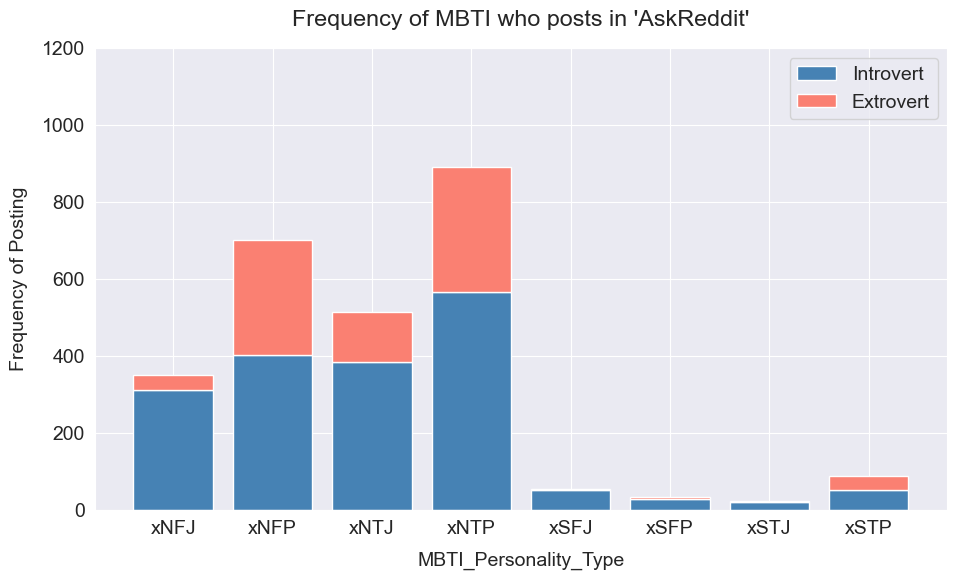

In [28]:
plt.figure(figsize=[11,6])
plt.bar(xMBTI, introverts.post_AskReddit, color='steelblue')
plt.bar(xMBTI ,extroverts.post_AskReddit, bottom=introverts.post_AskReddit, color='salmon')
plt.ylim([0, 1200])
plt.legend(labels=['Introvert', 'Extrovert'])
plt.xlabel("MBTI_Personality_Type", labelpad=10) #labelpad = distance between xlabel and graph
plt.ylabel("Frequency of Posting", labelpad=10) #labelpad = distance between ylabel and graph
plt.title("Frequency of MBTI who posts in 'AskReddit'", y=1.03)
plt.savefig("post_AskReddit.png");

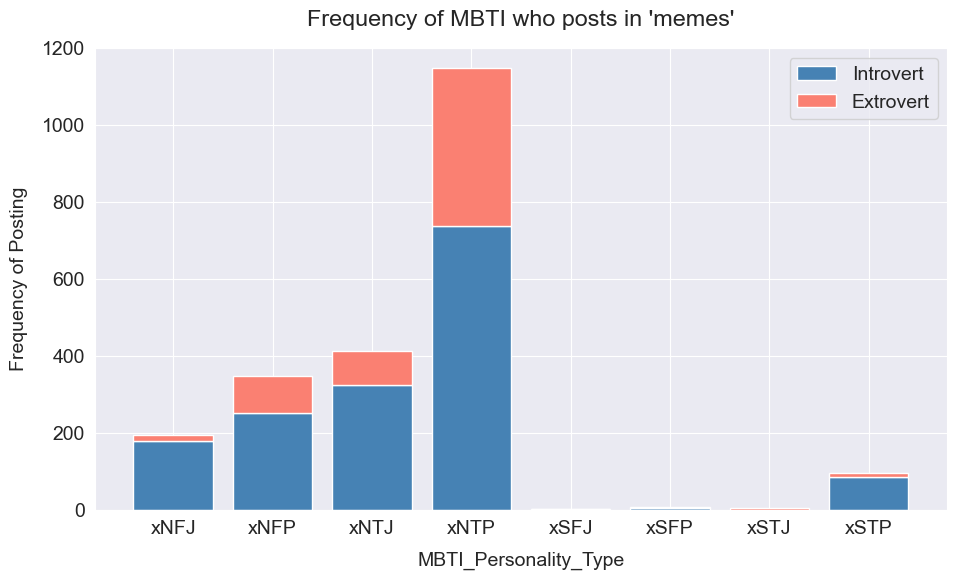

In [29]:
plt.figure(figsize=[11,6])
plt.bar(xMBTI, introverts.post_memes, color='steelblue')
plt.bar(xMBTI ,extroverts.post_memes, bottom=introverts.post_memes, color='salmon')
plt.legend(labels=['Introvert', 'Extrovert'])
plt.ylim([0, 1200])
plt.xlabel("MBTI_Personality_Type", labelpad=10) #labelpad = distance between xlabel and graph
plt.ylabel("Frequency of Posting", labelpad=10) #labelpad = distance between ylabel and graph
plt.title("Frequency of MBTI who posts in 'memes'", y=1.03)
plt.savefig("post_memes.png");

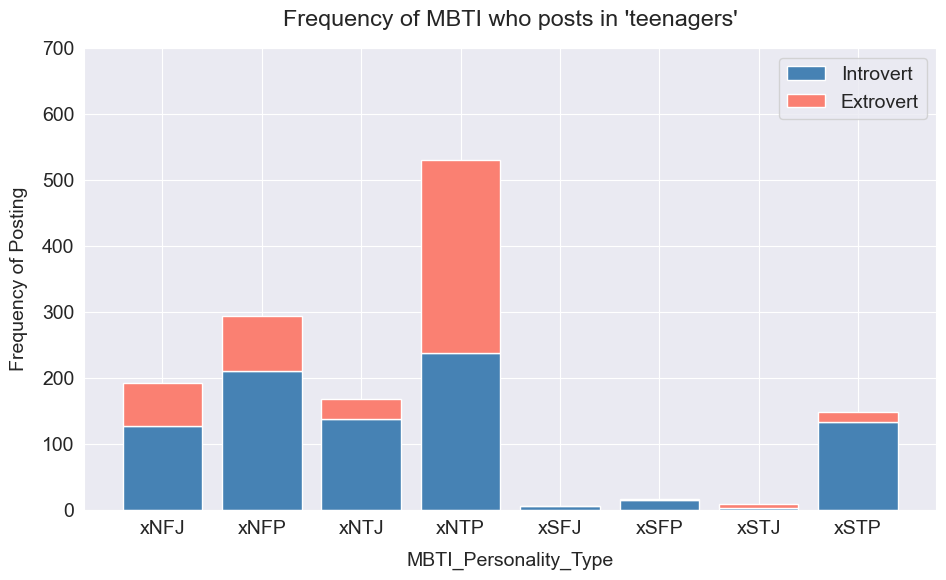

In [30]:
plt.figure(figsize=[11,6])
plt.bar(xMBTI, introverts.post_teenagers, color='steelblue')
plt.bar(xMBTI ,extroverts.post_teenagers, bottom=introverts.post_teenagers, color='salmon')
plt.ylim([0, 700])
plt.legend(labels=['Introvert', 'Extrovert'])
plt.xlabel("MBTI_Personality_Type", labelpad=10) #labelpad = distance between xlabel and graph
plt.ylabel("Frequency of Posting", labelpad=10) #labelpad = distance between ylabel and graph
plt.title("Frequency of MBTI who posts in 'teenagers'", y=1.03)
plt.savefig("post_teenagers.png");

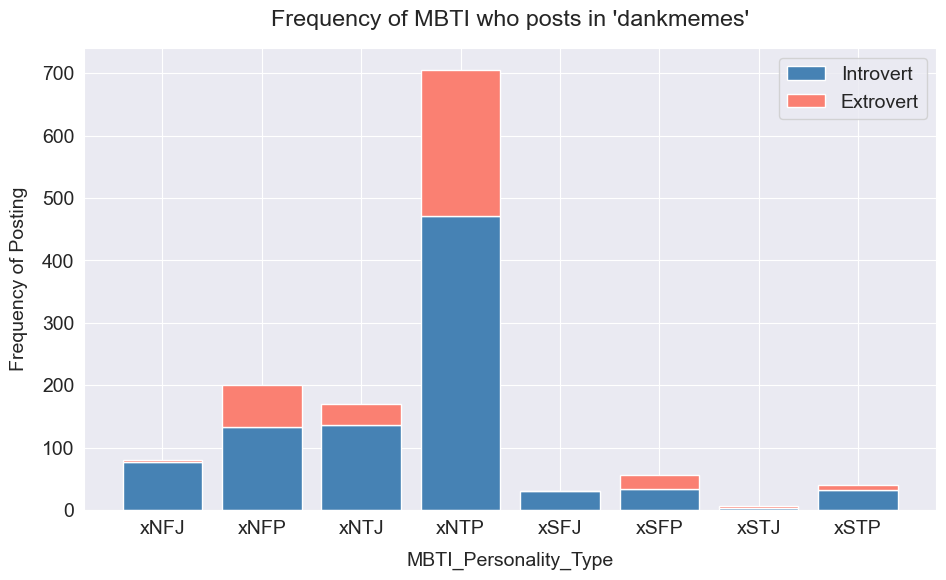

In [31]:
yA = introverts.post_dankmemes
yB = extroverts.post_dankmemes

plt.figure(figsize=[11,6])
plt.bar(xMBTI, yA, color='steelblue')
plt.bar(xMBTI ,yB, bottom=yA, color='salmon')
plt.legend(labels=['Introvert', 'Extrovert'])
plt.xlabel("MBTI_Personality_Type", labelpad=10) #labelpad = distance between xlabel and graph
plt.ylabel("Frequency of Posting", labelpad=10) #labelpad = distance between ylabel and graph
plt.title("Frequency of MBTI who posts in 'dankmemes'", y=1.03)
plt.savefig("post_dankmemes.png");

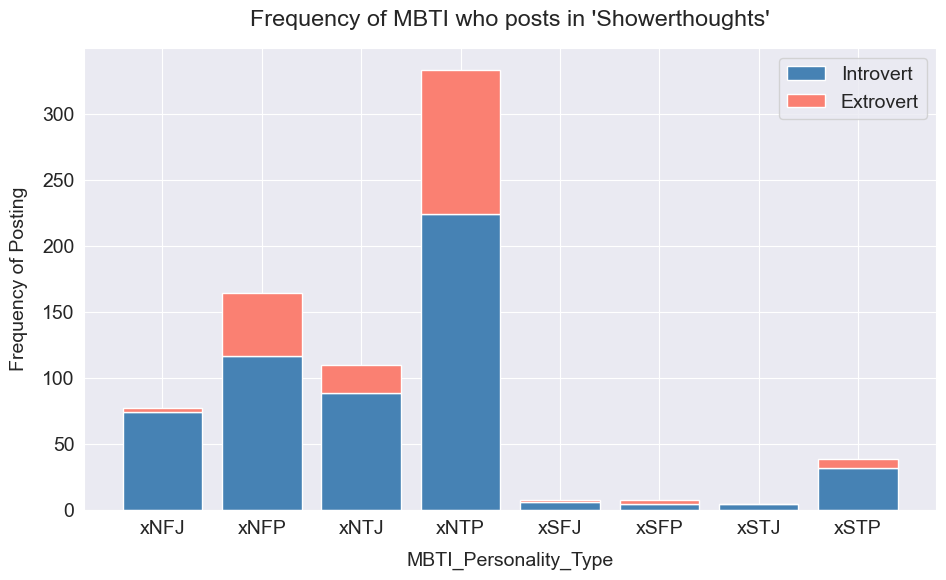

In [32]:
yA = introverts.post_Showerthoughts
yB = extroverts.post_Showerthoughts

plt.figure(figsize=[11,6])
plt.bar(xMBTI, yA, color='steelblue')
plt.bar(xMBTI ,yB, bottom=yA, color='salmon')
plt.legend(labels=['Introvert', 'Extrovert'])
plt.xlabel("MBTI_Personality_Type", labelpad=10) #labelpad = distance between xlabel and graph
plt.ylabel("Frequency of Posting", labelpad=10) #labelpad = distance between ylabel and graph
plt.title("Frequency of MBTI who posts in 'Showerthoughts'", y=1.03)
plt.savefig("post_Showerthoughts.png");

### All Frequency

In [33]:
mbti_df

,mbti_type,post_AskRedditAfterDark,post_unpopularopinion,post_introvert,post_UnpopularFacts,post_changemyview,post_nihilism,post_IntellectualDarkWeb,post_todayilearned,post_banned,...,comment_actual_detrans,comment_dearbrother,comment_battlefield_4,comment_fixingmovies,comment_AFD,comment_Actage,comment_sariyerbelediyesi,comment_Ben10,comment_MKMemes,comment_PIED
0,INTP,3,31,3,1,4,1,1,3,1,...,0,0,0,0,0,0,0,0,0,0
1,ENTP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,INFJ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,INFP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ENTP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,INTP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3582,ENFP,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
3583,INTP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,1,3,0
3584,INTP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
mbti_dfALL = mbti_df.copy()

In [35]:
mbti_dfALL['Sum Post&Comm']=mbti_dfALL.sum(axis=1)

/var/folders/1t/_nlb566973l888n0yh0dkj1r0000gn/T/ipykernel_2486/3647654643.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mbti_dfALL['Sum Post&Comm']=mbti_dfALL.sum(axis=1)


In [36]:
mbti_dfALL

,mbti_type,post_AskRedditAfterDark,post_unpopularopinion,post_introvert,post_UnpopularFacts,post_changemyview,post_nihilism,post_IntellectualDarkWeb,post_todayilearned,post_banned,...,comment_dearbrother,comment_battlefield_4,comment_fixingmovies,comment_AFD,comment_Actage,comment_sariyerbelediyesi,comment_Ben10,comment_MKMemes,comment_PIED,Sum Post&Comm
0,INTP,3,31,3,1,4,1,1,3,1,...,0,0,0,0,0,0,0,0,0,200
1,ENTP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,70
2,INFJ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,200
3,INFP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,182
4,ENTP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,INTP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,106
3582,ENFP,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,179
3583,INTP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,1,3,0,138
3584,INTP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [37]:
mbti_dfALL = mbti_dfALL[['mbti_type','Sum Post&Comm']] 
print(mbti_dfALL)

     mbti_type  Sum Post&Comm
0         INTP            200
1         ENTP             70
2         INFJ            200
3         INFP            182
4         ENTP            122
...        ...            ...
3581      INTP            106
3582      ENFP            179
3583      INTP            138
3584      INTP              6
3585      ENFP            152

[3586 rows x 2 columns]


In [38]:
word = 'xNTJ'

In [39]:
print(word[1:])

NTJ


In [40]:
mbti_dfALL[mbti_dfALL['mbti_type'].str.contains('INTJ|ENTJ')]['Sum Post&Comm'].sum()

78521

In [41]:
datas=[]
for xmbti in xMBTI:
    for type in ['I','E']:
        reg_xmbti = f"{type}{xmbti[1:]}"
        specific = mbti_dfALL[mbti_dfALL['mbti_type'].str.contains(reg_xmbti )] #okay
        each_data=[reg_xmbti, specific['Sum Post&Comm'].sum()]
        datas.append(each_data)
print(datas)

[['INFJ', 44097], ['ENFJ', 6197], ['INFP', 73357], ['ENFP', 39218], ['INTJ', 59868], ['ENTJ', 18653], ['INTP', 102321], ['ENTP', 51957], ['ISFJ', 3759], ['ESFJ', 1612], ['ISFP', 9264], ['ESFP', 3616], ['ISTJ', 5680], ['ESTJ', 2143], ['ISTP', 18322], ['ESTP', 5501]]


In [42]:
allPOSTCOMM = pd.DataFrame(datas, columns=['mbti_type', 'Sum Post&Comm'])
print(allPOSTCOMM)

   mbti_type  Sum Post&Comm
0       INFJ          44097
1       ENFJ           6197
2       INFP          73357
3       ENFP          39218
4       INTJ          59868
5       ENTJ          18653
6       INTP         102321
7       ENTP          51957
8       ISFJ           3759
9       ESFJ           1612
10      ISFP           9264
11      ESFP           3616
12      ISTJ           5680
13      ESTJ           2143
14      ISTP          18322
15      ESTP           5501


In [43]:
extroverts = allPOSTCOMM[np.char.find(allPOSTCOMM['mbti_type'].values.astype(str), 'E') > -1]
introverts = allPOSTCOMM[np.char.find(allPOSTCOMM['mbti_type'].values.astype(str), 'I') > -1]

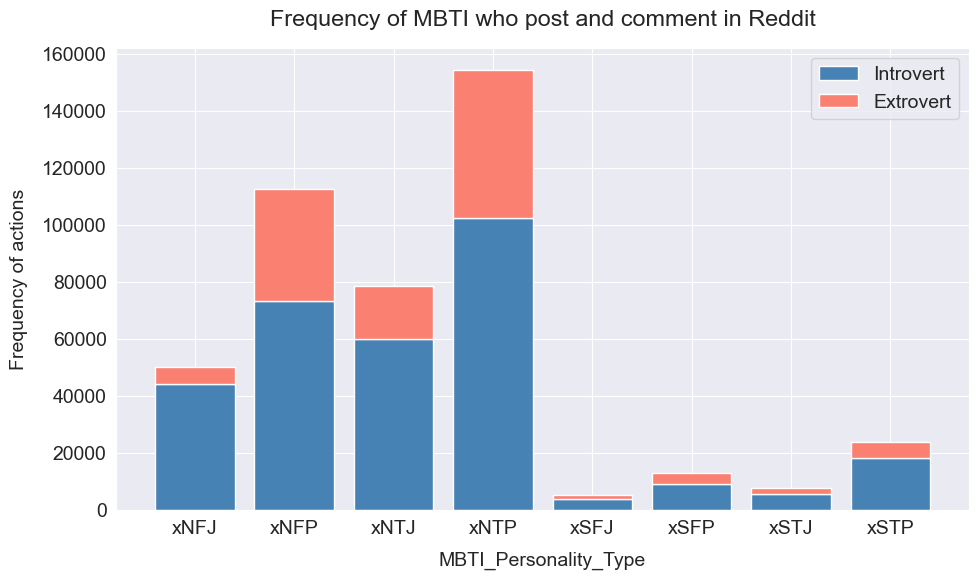

In [44]:
yA = introverts['Sum Post&Comm']
yB = extroverts['Sum Post&Comm']

plt.figure(figsize=[11,6])
plt.bar(xMBTI, yA, color='steelblue')
plt.bar(xMBTI ,yB, bottom=yA, color='salmon')
plt.legend(labels=['Introvert', 'Extrovert'])
plt.xlabel("MBTI_Personality_Type", labelpad=10) #labelpad = distance between xlabel and graph
plt.ylabel("Frequency of actions", labelpad=10) #labelpad = distance between ylabel and graph
plt.title("Frequency of MBTI who post and comment in Reddit", y=1.03)
plt.savefig("postcomm_ALL.png");

In [54]:
allPOSTCOMM.sort_values('Sum Post&Comm', ascending=False)

,mbti_type,Sum Post&Comm
6,INTP,102321
2,INFP,73357
4,INTJ,59868
7,ENTP,51957
0,INFJ,44097
3,ENFP,39218
5,ENTJ,18653
14,ISTP,18322
10,ISFP,9264
1,ENFJ,6197


In [85]:
allPOSTCOMM.sort_values('Sum Post&Comm', ascending=False)

,mbti_type,Sum Post&Comm
6,INTP,102321
2,INFP,73357
4,INTJ,59868
7,ENTP,51957
0,INFJ,44097
3,ENFP,39218
5,ENTJ,18653
14,ISTP,18322
10,ISFP,9264
1,ENFJ,6197


In [80]:
introvert_allPC = allPOSTCOMM.sort_values('mbti_type', ascending=False)[0:8]
extrovert_allPC = allPOSTCOMM.sort_values('mbti_type', ascending=False)[8:]

In [82]:
introvert_allPC.sum()

mbti_type        ISTPISTJISFPISFJINTPINTJINFPINFJ
Sum Post&Comm                              316668
dtype: object

In [83]:
extrovert_allPC.sum()

mbti_type        ESTPESTJESFPESFJENTPENTJENFPENFJ
Sum Post&Comm                              128897
dtype: object

Introverts Intractions = 316,668
Extroverts intractions = 128,897
Total =  445,565

In [88]:
print('introverts:',316_668/445_565)

introverts: 0.7107111195897344


In [89]:
print('extroverts:',128_897/445_565)

extroverts: 0.2892888804102656
